# Chapter04 자료의 수치적 특성

## 1. 중심위치의 척도 - 대푯값

### 평균

In [2]:
data = [26,31,28,38,41,26,18,16,25,29,
       39,38,38,40,43,38,39,41,41,40,
       26,19,39,28,43,34,21,41,29,30,
       12,22,45,34,29,26,29,58,42,16,
       41,42,38,42,28,42,39,41,39,43]

#### 방법1.기본 리스트 함수 이용

In [3]:
AVG = sum(data) / len(data)
print(f'''
sum:{sum(data)}
len:{len(data)}
AVG:{AVG}''')


sum:1693
len:50
AVG:33.86


#### 방법2. numpy 모듈 이용

In [3]:
import numpy as np

# AVG = np.mean(data)
# AVG

#### 방법3. scipy 모듈 이용

In [5]:
import scipy as sp

AVG = sp.mean(data)
AVG

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_6724/2545527756.py:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  AVG = sp.mean(data)


33.86

### [실습] 예제 4-1: 조선조 왕의 수명 평균 - 딕셔너리로 표현

In [11]:
import numpy as np
import math

# 키가 중복되면 안됨, 정조가 2개임 주의!!! 
data = {'태조':73, '정조1':62, '태종':45, '세종':53, '문종':38, 
        '단종':16, '세조':51, '예종':28, '성종':37, '연산군':30,
        '중종':56, '인종':30, '명종':33, '선조':56, '광해군':66,
        '인조':54, '효종':40, '현종':33, '숙종':59, '경종': 36,
        '영조':82, '정조2':48, '순조':44, '헌종':22, '철종':32,
        '고종':67, '순종':52}

values = list(data.values())
keys= list(data.keys())

AVG = np.mean(values)
print(f'조선조 왕의 평균나이: {math.floor(AVG)}')

조선조 왕의 평균나이: 46


#### @ 수명이 max, min 왕은?

In [19]:
idx = values.index( min(values) )
print(f'수명 min 왕: {keys[idx]}, {values[idx]}세')

idx = values.index( max(values) )
print(f'수명 max 왕: {keys[idx]}, {values[idx]}세')

수명 min 왕: 단종, 16세
수명 max 왕: 영조, 82세


### 중앙값

#### 정렬하기

In [20]:
# 딕셔너리 정렬하기
import operator

# value로 정렬 (key로 정렬은 itemgetter(0) )
data = sorted(data.items(), key=operator.itemgetter(1))
data

[('단종', 16),
 ('헌종', 22),
 ('예종', 28),
 ('연산군', 30),
 ('인종', 30),
 ('철종', 32),
 ('명종', 33),
 ('현종', 33),
 ('경종', 36),
 ('성종', 37),
 ('문종', 38),
 ('효종', 40),
 ('순조', 44),
 ('태종', 45),
 ('정조2', 48),
 ('세조', 51),
 ('순종', 52),
 ('세종', 53),
 ('인조', 54),
 ('중종', 56),
 ('선조', 56),
 ('숙종', 59),
 ('정조1', 62),
 ('광해군', 66),
 ('고종', 67),
 ('태조', 73),
 ('영조', 82)]

### [실습] 예제 4-2: 중앙값 찾기

#### 1.리스트에서 중앙값

In [24]:
data = {'태조':73, '정조1':62, '태종':45, '세종':53, '문종':38, 
        '단종':16, '세조':51, '예종':28, '성종':37, '연산군':30,
        '중종':56, '인종':30, '명종':33, '선조':56, '광해군':66,
        '인조':54, '효종':40, '현종':33, '숙종':59, '경종': 36,
        '영조':82, '정조2':48, '순조':44, '헌종':22, '철종':32,
        '고종':67, '순종':52}  #

values = sorted( list( data.values() ) )  # value만 추출하여 정렬하기
print(f'{len(values)}개, {values}')

# 전체 개수가 짝수 홀수에 따른 중앙값 찾기
N = len(values)
if N%2 == 0 : # 짝수    
    M = (values[int(N/2)]+values[int(N/2+1)])/2   #인덱스를 위해 정수로 변환
    print(f'중앙값-짝수: {M} ')
else : # 홀수
    idx = int((N+1)/2)
    M = values[idx-1]
    print(f'중앙값-홀수: {M} ')

27개, [16, 22, 28, 30, 30, 32, 33, 33, 36, 37, 38, 40, 44, 45, 48, 51, 52, 53, 54, 56, 56, 59, 62, 66, 67, 73, 82]
중앙값-홀수: 45 


#### 2. numpy 중앙값

In [25]:
M = np.median(values)
print('중앙값',int(M) )

중앙값 45


### 최빈값

### [실습] 예제 4-3: 자료의 최빈값 찾기

#### 1 .기본 문법 이용

In [32]:
values = list(data.values()) 

# 값에 해당하는 빈도수
counts = [values.count(i) for i in values]


maxcnt = max(cnt) # 최다 빈도수
maxval = []
for idx, i in enumerate(counts):
    if maxcnt == i:
        maxval.append(values[idx])
        
print(f'최다빈도수:{maxcnt}, 최다빈도: {set(maxval)}') # 중복 제거를 위해 set()함수로 변환


최다빈도수:2, 최다빈도: {56, 33, 30}


In [33]:
# 값:빈도수 --> 두 개의 리스트를 딕셔너리로 만듦
dic = {key:value for key, value in zip(values, counts)}
dic

{73: 1,
 62: 1,
 45: 1,
 53: 1,
 38: 1,
 16: 1,
 51: 1,
 28: 1,
 37: 1,
 30: 2,
 56: 2,
 33: 2,
 66: 1,
 54: 1,
 40: 1,
 59: 1,
 36: 1,
 82: 1,
 48: 1,
 44: 1,
 22: 1,
 32: 1,
 67: 1,
 52: 1}

#### 2. collections모듈의 counter 클래스 이용

In [35]:
from collections import Counter 

counts = Counter(values)
counts.most_common()

# 최빈값 상위 3개 
counts.most_common(3)

[(30, 2), (56, 2), (33, 2)]

#### 3.scipy.stats 서브패키지 이용

In [36]:
from scipy import stats

stats.mode(values)

ModeResult(mode=array([30]), count=array([2]))

In [173]:
# 범주(nominal)적 (숫자가 아닌) 데이터에도 적용됨
colors = ['red', 'yellow',' blue', 'red',]
stats.mode(colors)

ModeResult(mode=array(['red'], dtype='<U6'), count=array([2]))

---------

## 2. 산포도

### 산포도

[1 2 3 4 5 6 7 8 9]


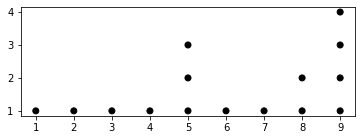

[4 5 6 7 8]


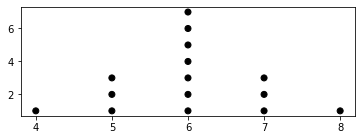

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def make_dotGraph(data):
    #1.고유한 측정값 찾기
    idx = np.unique(data)
    print(idx)
    val = [data.count(i) for i in idx]

    #2.계급구간 만들기
    x = np.arange(len(idx)) + 1    #X축:데이터 속성
    y = np.arange(1, max(val)+1)   #Y축:도수    
    X, Y = np.meshgrid(x,y)        #x-y 평면 범위(격자형태)

    #3.점도표 그리기
    plt.figure(figsize=(6,2)) # 그래프 사이즈
    plt.scatter(X, Y, c=Y<=val, cmap="Greys")
    plt.xticks(ticks=x, labels=idx)  #X축 레이블 지정함
    plt.show()
    
A = [1,2,3,4,5,5,5,6,7,8,8,9,9,9,9]
B = [4,5,5,5,6,6,6,6,6,6,6,7,7,7,8]

make_dotGraph(A)
make_dotGraph(B)


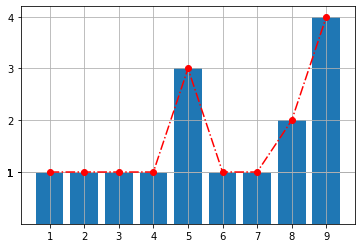

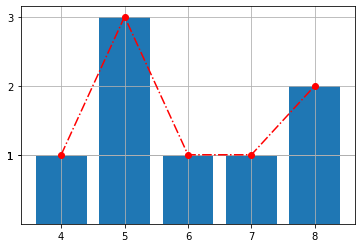

In [8]:
import matplotlib.pyplot as plt

def make_graph(data): 
    idx = np.unique(data)
    val = [A.count(i) for i in idx]

    plt.bar(idx, val)
    plt.plot(idx, val, 'o', linestyle='dashdot', color='r', label=val)
    plt.xticks(ticks=idx, labels=idx)  #X축 레이블 지정함
    plt.yticks(ticks=val, labels=val)  #Y축 레이블 지정함
    plt.grid()
    plt.show()
    
A = [1,2,3,4,5,5,5,6,7,8,8,9,9,9,9]
B = [4,5,5,5,6,6,6,6,6,6,6,7,7,7,8]
    
make_graph(A)
make_graph(B)

### 범위

#### 표본의 범위

In [204]:
S = [3, 4, 6, 7, 7, 9]   # 표본

R = max(S) -min(S)  # 범위 = 최대자료값 - 최소자료값
R

6

### 사분위수 범위

In [2]:
S = [3, 4, 6, 7, 7, 9]   # 표본

# 사분위범위: [0, 25, 50, 75, 100]
# Q1:25, Q2:50, Q3:75, Q4:100
# interpolation={‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’} 보간법
Q1 = np.percentile(S, [25], interpolation='nearest')
Q1 = np.percentile(S, 25, interpolation='linear') 
Q3 = np.percentile(S, [75], interpolation='linear') 

IQR= Q3 - Q1
print(Q1, Q3, IQR)

4.5 [7.] [2.5]


/var/folders/ds/3pccrhwd1hb9q3h_5q7b1cp80000gn/T/ipykernel_95979/3504154011.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(S, [25], interpolation='nearest')
/var/folders/ds/3pccrhwd1hb9q3h_5q7b1cp80000gn/T/ipykernel_95979/3504154011.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(S, 25, interpolation='linear')
/var/folders/ds/3pccrhwd1hb9q3h_5q7b1cp80000gn/T/ipykernel_95979/3504154011.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest',

In [38]:
import pandas as pd
num = pd.Series(S)

Q1 = num.quantile(.25)
Q3 = num.quantile(.75)
IQR = Q3 - Q1

IQR

2.5

### [실습] 예제: 사분위수 범위 구하기

In [39]:
S = [5, 9, 1, 3, 4, 1, 5, 7, 6, 4, 5]

Q1 = np.percentile(S, [25], interpolation='linear')  
Q3 = np.percentile(S, [75], interpolation='linear')  

IQR= Q3 - Q1
print(Q1, Q3, IQR)

[3.5] [5.5] [2.]


--------

### 평균편차
각 자료의 측정값과 평균과의 편차에 대한 절대값들의 평균

In [4]:
S = [3, 4, 6, 7, 7, 9]

M = sum(S) / len(S) #평균

S1 = [abs(M - i) for i in S ]  #평균과 측정값의 편차에 대한 절대값

MD = sum(S1) / len(S)  #평균편차    

print('평균편차:', round(MD,2))

평균편차: 1.67


### [실습] 예제 : 평균편차 구하기

In [2]:
import numpy as np

S = [3, 4, 6, 7, 7, 9]

M = np.mean(S) #평균 : sum(S) / len(S) #평균

S1 = [abs(M - i) for i in S ]  #평균과 측정값의 편차에 대한 절대값

MD = np.sum(S1) / len(S)  #평균편차    

print('평균편차:', round(MD,2))

평균편차: 1.67


----------

### 분산
평균을 중심으로 밀집되거나 퍼짐 정도를 나타내는 척도

### [실습] 예제 : 분산 구하기

In [40]:
S = [3, 4, 6, 7, 7, 9]

#ddof -> 표본에 대한 것은 1로 한다는 것을 알고있어라. 시험에 나옴.
#모분산
# 1/n, np.var(S)  ddof: Delta Degrees of Freedom 자유도
var = np.var(S, ddof=0)  
print('모분산:', var)

#표본분산
# 1/n-1  ddof = 1은 표준편차를 계산할 때, n-1로 나누라는 의미
var = np.var(S, ddof=1)  
print('표본분산:',var)

모분산: 4.0
표본분산: 4.8


---------

### 표준편차

### [실습] 예제 : 표준편차 구하기

In [8]:
S = [3, 4, 6, 7, 7, 9]

#모표준편차
std = np.std(S, ddof=0)  # 1/N, np.std(S) 
print('모표준편차:', '%.2f'%std) # 소수점 2째 자리 출력
print(f'모표준편차: {std:1.2}') # 소수점 2째 자리 출력

#표본표준편차
std = np.std(S, ddof=1)  # 1/N-1
print('표본표준편차:', '%.2f'%std)

모표준편차: 2.00
모표준편차: 2.0
표본표준편차: 2.19


----------

### 변동계수
 - 측정단위가 동일한 두 자료집단: 평균이 큰 차이를 보이는 두 자료집단 
 - 측정단위가 서로 다른 두 자료집단: 산포의 척도를 비교할 때 많이 사용한다.

### [실습] 예제 : 변동계수 구하기

In [1]:
A = [171, 164, 167, 156, 159, 164]
B = [11.5, 12.2, 12.0, 12.4, 13.6, 10.5]

A_M = np.mean(A)  #표본평균
B_M = np.mean(B)  #표본평균

A_std = np.std(A, ddof=1)  # 표본 표준편차
B_std = np.std(B, ddof=1)  # 표본 표준편차

print('%.2f'%A_M, '%.2f'%A_std) #소수점 2자리로 표현
print('%.2f'%B_M, '%.2f'%B_std)

A_cov = A_std / A_M * 100  #변동계수
B_cov = B_std / B_M * 100  #변동계수

print('A변동계수: ', round(A_cov,2))
print('B변동계수: ', round(B_cov,2) )

NameError: name 'np' is not defined

--------

## 3. 위치척도와 상자그림

### Z-점수
각 자료의 측정값을 그 측정값과 평균과의 편차를 표준편차로 나눈 수치(z-score)

### [실습] 예제 : z-점수 구하기

In [40]:
A = [171, 164, 167, 156, 159, 164]
B = [11.5, 12.2, 12.0, 12.4, 13.6, 10.5]

#표본평균, #표본표준편차 
#--> 소수점 단위에 따라 값이 달라 질 수 있다.
A_M = round(np.mean(A), 2)  #표본평균
B_M = round(np.mean(B))   #표본평균

A_std = round(np.std(A, ddof=1), 2)  #표본표준편차
B_std = round(np.std(B, ddof=1), 3)  #표본표준편차

#z-점수
A_z = ['%.2f'%((i - A_M)/A_std) for i in A]
B_z = ['%.2f'%((i - B_M)/B_std) for i in B]


import pandas as pd 

val = [A_z]  #2차원 배열로 만듦
df1 = pd.DataFrame(val, columns=A, index=['z-점수'])
df1.columns.name = 'A자료값'

val = [B_z]  #2차원 배열로 만듦
df2 = pd.DataFrame(val, columns=B, index=['z-점수'])
df2.columns.name = 'B자료값'

print(df1)
print('-'*50)
print(df2)

A자료값   171   164   167    156    159   164
z-점수  1.39  0.09  0.65  -1.39  -0.83  0.09
--------------------------------------------------
B자료값   11.5  12.2  12.0  12.4  13.6   10.5
z-점수  -0.49  0.20  0.00  0.39  1.56  -1.46


### 백분위수와 사분위수
 - 백분위수(percentile): 수집한 자료를 크기순으로 나열할 때, 1%씩 등간격으로 구분하는 척도
 - 사분위수(quartiles): 수집한 자룔를 크기순으로 나열하여 4등분하는 척도, Q1, Q2, Q3

### [실습] 예제 : 사분위수 구하기

In [2]:
import numpy as np

S = [26,31,27,38,42,26,18,17,25,29,
        39,38,38,40,46,38,39,41,41,40,
        26,19,39,28,45,34,21,41,30,30,
        12,22,48,34,29,26,29,58,43,16,
        42,44,38,44,28,43,39,42,39,46]

Q1 = np.percentile(S, 25, interpolation='nearest') 
Q2 = np.percentile(S, 50, interpolation='nearest') 
Q3 = np.percentile(S, 75, interpolation='nearest')
Q4 = np.percentile(S, 100, interpolation='nearest')

print('Q1:',Q1, 'Q2:',Q2, 'Q3:',Q3, 'Q4:',Q4)

Q1: 27 Q2: 38 Q3: 41 Q4: 58


---------

### 상자그림
 - Box Plot: 사분위수를 이용하여 수집한 자료에 포함된 특이값을 알려주는 그림
 - 두 개 이상의 자료 집단을 비교할 때 매우 유용

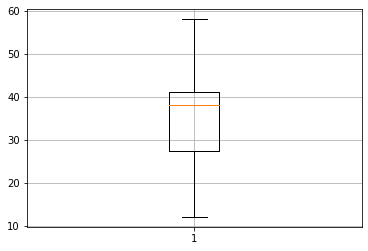

In [6]:
import matplotlib.pyplot as plt

plt.boxplot(S)
plt.grid()
plt.show()

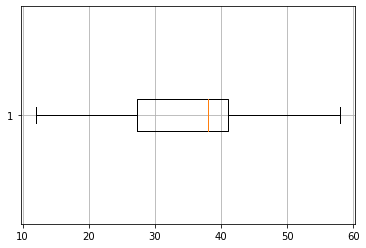

In [7]:
# 가로로 그리기
plt.boxplot(S, vert=False)
plt.grid()
plt.show()

----------

## 4. 도수분포표에서의 평균과 분산

#### 도수분포표에서의 평균 & 분산 & 표준편차

In [4]:
import math 
import numpy as np
import pandas as pd

data = [10,37,22,32,18,15,15,18,22,15,
       20,25,38,28,25,30,20,22,18,22,
       22,12,22,26,22,32,22,23,20,23,
       23,20,25,51,20,25,26,22,26,28,
       28,20,23,30,12,22,35,11,20,25]

# 1.계급 수
k = 5
# 2.R : 최대측정값 - 최소측정값
R = max(data) - min(data)
# 3.계급 간격
w = math.ceil(R/k) 
# 4.시작 계급값
s = min(data) - 0.5

# 전체 계급
bins = np.arange(s, max(data)+w, step=w)  #계급

print(f'계급수:{k}, R:{R}, 계급간격:{w}, 계급시작값:{s}')
print(f'계급:{bins}')

#계급구간
index = [f'{bins[i]} ~ {bins[i+1]}' for i in range(len(bins)) if i<(len(bins)-1) ]

#도수 데이터
hist, bins = np.histogram(data, bins)
print(hist)

# 도수분포표 만들기
df = pd.DataFrame(hist, index=index, columns=['도수'])
df.index.name = '계급간격'

# fi: 도수
#print(f"도수: {df['도수']} ")


# xi: 계급값
df['계급값'] = [ int((bins[x]+bins[x+1])/2) for x in range(k)]


# x_: 도수분포표 평균
x_ = sum([ df['도수'][idx] * i for idx, i in enumerate(df['계급값']) ]) / sum(df['도수'])
print(f'x_:{x_}')


# x-x_: 도수분포표 평균(x_) - 계급값
df['x-x_'] = [ x - x_ for x in df['계급값'] ]


# (x-x_)**2 
df['(x-x_)^2'] = [ (x - x_)**2 for x in df['계급값'] ]


# (x-x_)**2 * fi
df['(x-x_)^2*fi'] = [ (x - x_)**2*i for i, x in zip(df['도수'],df['계급값']) ]

# 합계
df.loc['합계'] = [ sum(df['도수']), '','','',sum(df['(x-x_)^2*fi']) ]

df

계급수:5, R:41, 계급간격:9, 계급시작값:9.5
계급:[ 9.5 18.5 27.5 36.5 45.5 54.5]
[10 29  8  2  1]
x_:23.9


,도수,계급값,x-x_,(x-x_)^2,(x-x_)^2*fi
계급간격,,,,,
9.5 ~ 18.5,10,14,-9.9,98.01,980.10
18.5 ~ 27.5,29,23,-0.9,0.81,23.49
27.5 ~ 36.5,8,32,8.1,65.61,524.88
36.5 ~ 45.5,2,41,17.1,292.41,584.82
45.5 ~ 54.5,1,50,26.1,681.21,681.21
합계,50,,,,2794.50
